# inverse transformation sampling

Inverse transform sampling is a method to rescale a uniform random variable such that it has a desired probability distribution using the cumulative distrbution function of the probability distribution. The cumulative distribution function of the histogram maps the space of possible values of the random variable to the region ${[0, 1]}$. If this is inverted, uniform random numbers can be sampled and transformed to the target distribution.

To do this, the CDF of each bin in the histogram is calculated and an interpolation is made using SciPy. Then, uniform pseudorandom points are sampled and passed through the inverse CDF.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import scipy.interpolate as interpolate
import seaborn as sns
import shijian

%matplotlib inline
shijian.setup_Jupyter()

In [2]:
def inverse_transform_sampling(
    data      = None,
    n_bins    = 40,
    n_samples = 1000
    ):
    hist, bin_edges = np.histogram(
        data,
        bins    = n_bins,
        density = True
    )
    cumulative_values     = np.zeros(bin_edges.shape)
    cumulative_values[1:] = np.cumsum(hist * np.diff(bin_edges))
    inverse_CDF           = interpolate.interp1d(cumulative_values, bin_edges)
    r = np.random.rand(n_samples)
    return inverse_CDF(r)

def inverse_transform_sampling_2D(
    x         = None,
    y         = None,
    n_bins    = 40,
    n_samples = 1000
    ):
    return (
        inverse_transform_sampling(
            data      = x,
            n_bins    = n_bins,
            n_samples = n_samples
        ),
        inverse_transform_sampling(
            data      = y,
            n_bins    = n_bins,
            n_samples = n_samples
        )
    )

In [3]:
data = concatenate((normal(1, .2, 5000), normal(2, .2, 2500)))

data_ITF = inverse_transform_sampling(
    data      = data,
    n_bins    = 100,
    n_samples = 7500
)

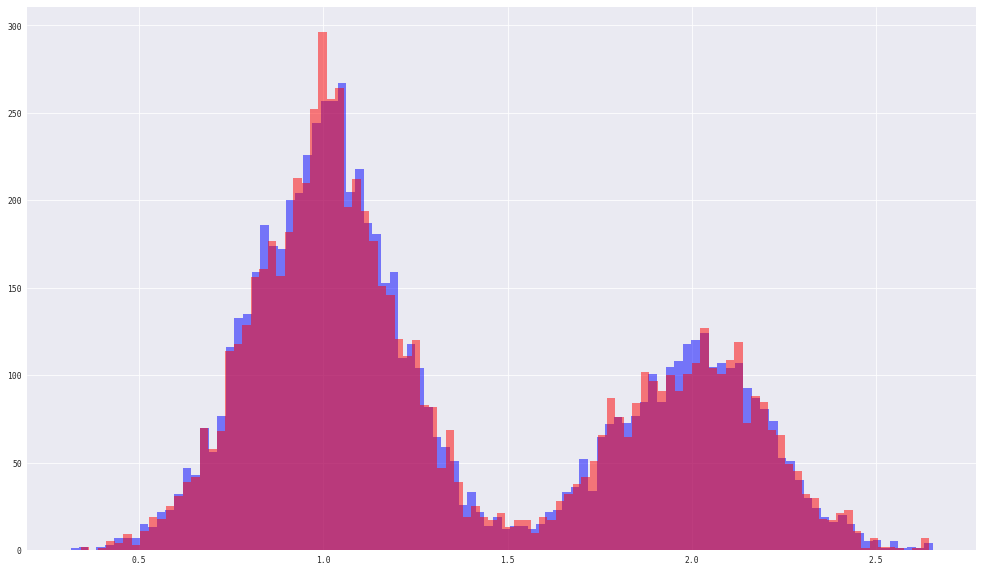

In [4]:
plt.hist(data,     bins = 100, alpha = 0.5, color = "#0000ff")
plt.hist(data_ITF, bins = 100, alpha = 0.5, color = "#ff0000")
plt.show();

In [5]:
x = concatenate((normal(1, .2, 50000), normal(2, .2, 25000)))
y = np.random.randn(75000)

data_ITF = inverse_transform_sampling_2D(
    x         = x,
    y         = y,
    n_bins    = 100,
    n_samples = 75000
)

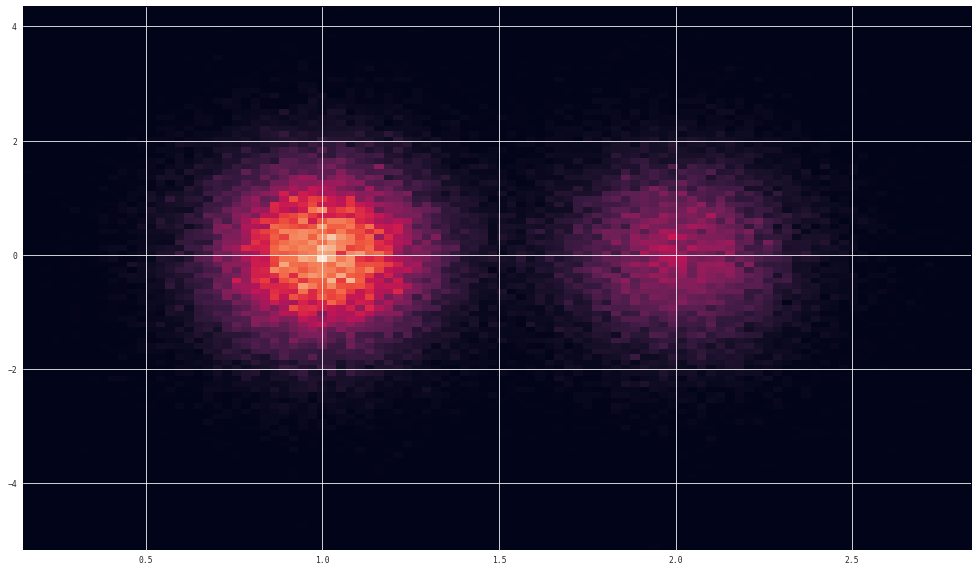

In [6]:
plt.hist2d(x, y, bins = 100)
plt.show()

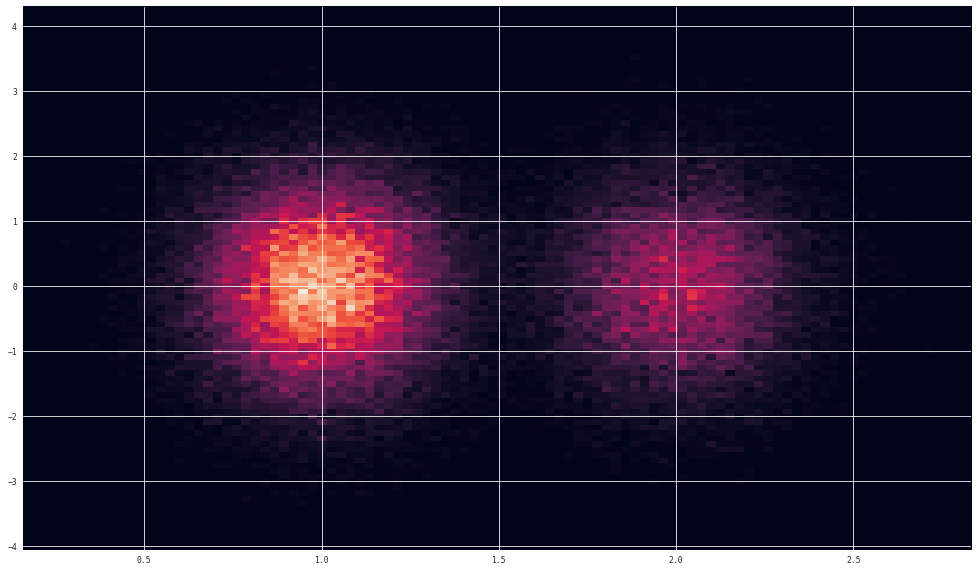

In [7]:
plt.hist2d(data_ITF[0], data_ITF[1], bins = 100)
plt.show()